<center><font size=4> Université Catholique de Louvain </center>
 <h1><center><font size=5> [LPHYS1303] - Simulation Numérique Physique </center></h1>
 <h1><center><font size=6> Projet Différences Finies : Soliton & KdV Equation </center></h1>
 <h1><center><font size=4>
     Duynslaeger Sacha : 50951900 <br>
     Léonard Guillaume : 16321800 <br>
     </center></h1>

<img src="figures/ucl.png" width = "200">

__________________________
<br> <br>

Intro ...<br><br>

<font size=4> KdV Equation : <br> </font>

  <center> $\Large \frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} + \delta^2\frac{\partial^3 u}{\partial x^3} = 0 $  <br> </center>

<br>

# <font size=5> 1. Schéma Upwind <br><br> </font>

Formulation discrète : <br><br>

<center>$u_{i,j+1} = u_{i,j} - \frac{\Delta t}{\Delta x}u_{i,j}\left\{\begin{array}{ll}
    (u_{i,j} - u_{i-1,j})\\
    (u_{i+1,j} - u_{i,j})
\end{array} \right - \delta^2\frac{\Delta t}{2(\Delta x)^3}(u_{i+2,j} - 2u_{i+1,j} + 2u_{i-1,j} - u_{i-2,j})$
</center> <br>

## <font size=4> 1.1 Consistance du schéma <br> </font>

    ...

## <font size=4> 1.2 Stencil </font>

<img src="figures/upwind_stencil.png" width = "800">

## <font size=4> 1.3 Condition de stabilité <br> </font>

    ...


# <font size=5> 2. Schéma de Zabusky et Kruskal <br><br> </font>

Formulation discrète : <br><br>

<center>$u_{i,j+1} = u_{i,j-1} - \frac{1}{3}\frac{\Delta t}{\Delta x}(u_{i+1,j} + u_{i,j} + u_{i-1,j})(u_{i+1,j} - u_{i-1,j}) - \delta^2\frac{\Delta t}{(\Delta x)^3}(u_{i+2,j} - 2u_{i+1,j} + 2u_{i-1,j} - u_{i-2,j})$
</center> <br>

## <font size=4> 2.1 Consistance du schéma <br> </font>

    ...

## <font size=4> 2.2 Ordre de convergence <br> </font>

    ...


# <font size=5> 3. Visualisation <br> </font>

Discrétisation utilisée :

Condition initiale et paramètres :



In [7]:
#Code utilisé pour la visualisation
# Install a pip package in the current Jupyter kernel
#import sys
#!{sys.executable} -m pip install matplotlib

''' Import Module'''
import numpy as np
import matplotlib.pyplot as plt

''' Data '''
dx = 0.1739
N = int(2*np.pi/dx)+1
x = np.arange(-np.pi,np.pi,dx)
dt = 0.0002
Nt = int(20/dt)
t = np.arange(0,20,dt)

delta = 0.022
A = 1
k = (A/2)**0.5
w = 4*k**3

''' Solution exacte '''
uexact = np.zeros((Nt, N))
for j in range(Nt):
    uexact[j] = A/(np.cosh(k*x-w*t[j])**2)


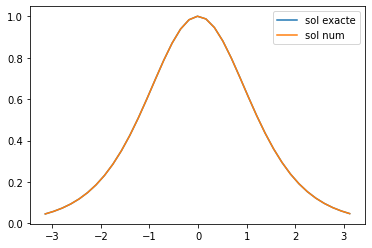

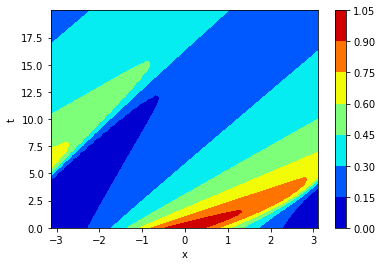

In [8]:
# Upwind
u = np.zeros((Nt, N))
u0 = A/(np.cosh(k*x)**2)
u[0] = u0

for j in range(Nt-1):
    for i in range(0,N-2):
        if u[j][i]>0:
            u[j+1][i] = u[j][i] - (dt/dx)*u[j][i]*(u[j][i]-u[j][i-1]) - ((dt*delta**2)/(2*dx**3))*(u[j][i+2]-2*u[j][i+1]+2*u[j][i-1]-u[j][i-2])
        else:
            u[j+1][i] = u[j][i] - (dt/dx)*u[j][i]*(u[j][i+1]-u[j][i]) - ((dt*delta**2)/(2*dx**3))*(u[j][i+2]-2*u[j][i+1]+2*u[j][i-1]-u[j][i-2])
    if u[j][N-2]>0:
        u[j+1][N-2] = u[j][N-2] - (dt/dx)*u[j][N-2]*(u[j][N-2]-u[j][N-3]) - ((dt*delta**2)/(2*dx**3))*(u[j][0]-2*u[j][N-1]+2*u[j][N-3]-u[j][N-4])
    else:
        u[j+1][N-2] = u[j][N-2] - (dt/dx)*u[j][N-2]*(u[j][N-1]-u[j][N-2]) - ((dt*delta**2)/(2*dx**3))*(u[j][0]-2*u[j][N-1]+2*u[j][N-3]-u[j][N-4])
    if u[j][N-1]>0:
        u[j+1][N-1] = u[j][N-1] - (dt/dx)*u[j][N-1]*(u[j][N-1]-u[j][N-2]) - ((dt*delta**2)/(2*dx**3))*(u[j][1]-2*u[j][0]+2*u[j][N-2]-u[j][N-3])
    else:
        u[j+1][N-1] = u[j][N-1] - (dt/dx)*u[j][N-1]*(u[j][0]-u[j][N-1]) - ((dt*delta**2)/(2*dx**3))*(u[j][1]-2*u[j][0]+2*u[j][N-2]-u[j][N-3])

time = 1
plt.plot(x,uexact[time],label='sol exacte')
plt.plot(x,u[time],label='sol num')
plt.legend()
plt.show()

"""
for n in range(0,Nt,int(Nt/100)):
    if n==0: fig, ax = plt.subplots(figsize=(5.5,4))
    plt.clf()
    plt.plot(x,u[n,:])
    plt.scatter(x,uexact[n,:])
    plt.gca().legend(('numerique','exact'))
    plt.gca()
    plt.title('coucou')
    plt.xlabel('x')
    plt.ylabel('u')
    plt.subplots_adjust(left=0.2)
    plt.subplots_adjust(bottom=0.18)
    plt.draw()
    plt.pause(0.001)
plt.show()
"""

[xx,tt]=np.meshgrid(x,t)
plt.contourf(xx,tt,u, cmap = 'jet')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('t')
plt.show()

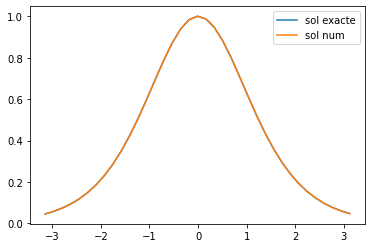

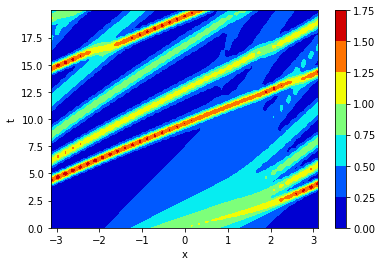

In [9]:
# Leap-frog (Zabusky et Kruskal)
un = np.zeros((Nt, N))
un0 = A/(np.cosh(k*x)**2)
un[0] = un0

un[1] = un0
for i in range(0,N-2):
    un[1][i] = un[0][i] - (dt/(3*dx))*(un[0][i+1]+un[0][i]+un[0][i-1])*(un[0][i+1]-un[0][i-1]) - (dt*delta*delta/(2*dx**3))*(un[0][i+2]-2*un[0][i+1]+2*un[0][i-1]-un[0][i-2])
un[1][N-2] = un[0][N-2] - (dt/(3*dx))*(un[1][N-1]+un[1][N-2]+un[1][N-3])*(un[1][N-1]-un[1][N-3]) - ((dt*delta*delta)/(dx**3))*(un[1][0]-2*un[1][N-1]+2*un[1][N-3]-un[1][N-4])
un[1][N-1] = un[0][N-1] - (dt/(3*dx))*(un[1][0]+un[1][N-1]+un[1][N-2])*(un[1][0]-un[1][N-2]) - ((dt*delta*delta)/(dx**3))*(un[1][1]-2*un[1][0]+2*un[1][N-2]-un[1][N-3])

for j in range(1,Nt-1):
    for i in range(0,N-2):
        un[j+1][i] = un[j-1][i] - (dt/(3*dx))*(un[j][i+1]+un[j][i]+un[j][i-1])*(un[j][i+1]-un[j][i-1]) - ((dt*delta*delta)/(dx**3))*(un[j][i+2]-2*un[j][i+1]+2*un[j][i-1]-un[j][i-2])
    un[j+1][N-2] = un[j-1][N-2] - (dt/(3*dx))*(un[j][N-1]+un[j][N-2]+un[j][N-3])*(un[j][N-1]-un[j][N-3]) - ((dt*delta*delta)/(dx**3))*(un[j][0]-2*un[j][N-1]+2*un[j][N-3]-un[j][N-4])
    un[j+1][N-1] = un[j-1][N-1] - (dt/(3*dx))*(un[j][0]+un[j][N-1]+un[j][N-2])*(un[j][0]-un[j][N-2]) - ((dt*delta*delta)/(dx**3))*(un[j][1]-2*un[j][0]+2*un[j][N-2]-un[j][N-3])

time = 1
plt.plot(x,uexact[time],label='sol exacte')
plt.plot(x,un[time],label='sol num')
plt.legend()
plt.show()

"""
for n in range(0,Nt,int(Nt/100)):
    if n==0: fig, ax = plt.subplots(figsize=(5.5,4))
    plt.clf()
    plt.plot(x,un[n,:])
    plt.scatter(x,uexact[n,:])
    plt.gca().legend(('numerique','exact'))
    plt.gca()
    plt.title('coucou')
    plt.xlabel('x')
    plt.ylabel('u')
    plt.subplots_adjust(left=0.2)
    plt.subplots_adjust(bottom=0.18)
    plt.draw()
    plt.pause(0.001)
plt.show()
"""


[xx,tt]=np.meshgrid(x,t)
plt.contourf(xx,tt,un, cmap = 'jet')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('t')
plt.show()

# <font size=5> 4. Analyse des résultats <br> </font>